<a href="https://colab.research.google.com/github/rashwinr/MONAI_tutorials/blob/main/MONAI_data_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MONAI**
<center><img src="https://github.com/Project-MONAI/monai-bootcamp/blob/main/MONAICore/monai.png?raw=1"/></center>

"MONAI" stands for **Medical Open Network for Artificial Intelligence**

MONAI consists of three frameworks:
*   MONAI Label: seemlessly integrates into label generation workflow
*   MONAI Core: enables clinicians and researchers to build AI models to work on **Medical Imaging** data
*   MONAI Deploy: facilitates easy transition of Python programs into a deployable application


This colab notebook will introduce you to the *MONAI Core*'s design and architecture. We will get hands-on examples with MONAI's data variable, transforms, dataset</p>



## *Install & import*  **MONAI**

MONAI is:   

*   an open-source
*   freely available
*   collaborative framework
*   **Low-code framework**

built on **pyTorch** and **Python** for **accelarting research** & **clinical collaboration** in **Medical Image Analysis**



In [ ]:
!pip show monai
# !pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

## **PIP**

``pip`` is a tool that lets you install and manage Python packages (libraries) from the Python Package Index (PyPI) and other repositories

*   Syntax for verification of a package installation``pip show <package_name>``
*   Syntax for installation of a new package ``pip install <package_name>``




In [ ]:
!pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.2 MB/s eta 0:00:00


In [ ]:
!pip show monai

Name: monai
Version: 1.3.2
Summary: AI Toolkit for Healthcare Imaging
Home-page: https://monai.io/
Author: MONAI Consortium
Author-email: monai.contact@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, torch
Required-by: 


## **IMPORT**

``import`` is a statement to bring from other files or modules into your current script, allowing us to use their functions, classes, and variables

In [ ]:
import monai
from monai.config import print_config
print_config()

MONAI version: 1.3.2
Numpy version: 1.26.4
Pytorch version: 2.4.1+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 59a7211070538586369afd4a01eca0a7fe2e742e
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.2.1
scikit-image version: 0.24.0
scipy version: 1.13.1
Pillow version: 10.4.0
Tensorboard version: 2.17.0
gdown version: 5.2.0
TorchVision version: 0.19.1+cu121
tqdm version: 4.66.5
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 2.1.4
einops version: 0.8.0
transformers version: 4.44.2
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/l

In [ ]:
!pip show nibabel

Name: nibabel
Version: 5.2.1
Summary: Access a multitude of neuroimaging data formats
Home-page: https://nipy.org/nibabel
Author: 
Author-email: NiBabel developers <neuroimaging@python.org>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging
Required-by: 


# **Google Drive**

You can mount your Google Drive to Google Colab, which allows you to access files stored in your Drive directly within Colab. This can be done using the following code generated when you click the drive button under ``Files``:



# **GDOWN**

``gdown`` is a Python library that facilitates downloading files directly from Google Drive using Python code

Syntax for gdown: ``gdown.download(url,output,quiet=False)``

*   ``url = 'google drivelink to the shared file'``
*   ``output = 'download_file.ext'`` where download_file in a filename in the colab environment and ".ext" is the file extension type vis-\`a-vis pdf, txt, zip, etc.


In [ ]:
!pip show gdown

Name: gdown
Version: 5.2.0
Summary: Google Drive Public File/Folder Downloader
Home-page: https://github.com/wkentaro/gdown
Author: 
Author-email: Kentaro Wada <www.kentaro.wada@gmail.com>
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: beautifulsoup4, filelock, requests, tqdm
Required-by: 


## **Load data from Google Drive**

Let us use gdown to import a file, which stands for "comma separated values"

In [ ]:
import gdown
# Link to the CSV File: https://drive.google.com/file/d/1vdgym7vXeZQig-WHFp00tridUZocsB6J/view?usp=drive_link
# https://drive.google.com/file/d/1vdgym7vXeZQig-WHFp00tridUZocsB6J/view?usp=drive_link
# https://drive.google.com/file/d/1owmOCVzDFRWnBKBnmpRSzteuhHH35JEd/view?usp=drive_link
file_id = '1vdgym7vXeZQig-WHFp00tridUZocsB6J'
url = f'https://drive.google.com/uc?id={file_id}'
file_name = 'url_csv.csv'

gdown.download(url, file_name, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1vdgym7vXeZQig-WHFp00tridUZocsB6J
To: /content/url_csv.csv
100%|██████████| 168/168 [00:00<00:00, 166kB/s]


'url_csv.csv'

The file present in the URL will be added to your colab environment seamlessly enabling you to access them!

Please go ahead and select the folder icon on the left tool pallete to access the downloaded file. The contents in the file shall be viewed by double-click'n the file


# **PANDAS**

``pandas`` is a library for data analysis, providing data structures and tools for working with structured data like tables and time series

*   Syntax: ``import pandas as pd``
  * Here we import pandas as a variable pd for brevity and ease of use
  * Not necessary to import as ``pandas`` is built-in in *Google Colaboratory*


In [ ]:
import pandas as pd

## **Load ``csv`` data as table**

Let us find where the file is located!

In [ ]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

file_path = os.path.join(current_directory, file_name)
print("File path:", file_path)

Current working directory: /content
File path: /content/url_csv.csv


Once we have found the address to the file, let us load the file:

* Syntax: ``df = pd.read_csv(file_path) `` or ``df = pd.read_csv('/content/url_csv.csv')``
* ``df`` here is a DataFrame
  * A DataFrame is a versatile **two-dimensional table-like structure** used to **store, explore, & manipulate data**

In [ ]:
df = pd.read_csv(file_path)

# print(df)
print(f"The no. of columns in the file is: {len(df.columns)}, which are {df.columns}")
print(f"The no. of rows in the file is: {len(df.index)}")


The no. of columns in the file is: 2, which are Index(['File', 'FileID'], dtype='object')
The no. of rows in the file is: 4


Let us check if the output is correct:

In [ ]:
print(df)

    File                             FileID
0  DICOM  1wQCJiKI8fV7Nc-oINaE_aNfri7X2KPsi
1    PNG  1H5MeQol4BUNK-9MY7clXaFyS2uJ05bRN
2  NIFTI  13LdwwpFhQQUwN7unnYeAOdnT83PMVeD9
3    TIF  1R9Gqa2NekomYWiLmFVWh80w5dXj0ElHa


## **Explore data**

Let us print everyting in the row File

In [ ]:
print(df['File'])

0    DICOM
1      PNG
2    NIFTI
3      TIF
Name: File, dtype: object


Let us attempt to print the URL of a file using ``df.loc`` command

* Syntax: ``df2 = df.loc[df['File]=='TIF']``

It creates a new DataFrame with ``df['File']=='TIF'``, which save it to ``df2``

In [ ]:
df2 = df.loc[df['File'] == 'TIF']
# print(df2)
print(type(df2))
print(df2)
print(type(df2['FileID']))
print(df2['FileID'])

<class 'pandas.core.frame.DataFrame'>
  File                             FileID
3  TIF  1R9Gqa2NekomYWiLmFVWh80w5dXj0ElHa
<class 'pandas.core.series.Series'>
3    1R9Gqa2NekomYWiLmFVWh80w5dXj0ElHa
Name: FileID, dtype: object


Let us convert the URLs into files in our Colab environment

* Syntax for URL: ``url = df2['URL'].iloc[0]``
* We set the file name as: ``file_name = "df.tif"``
* Google Drive Download: ``gdown.download(url, file_name, quiet=False)``

In [ ]:
file_id = str(df2['FileID'].iloc[0])
file_name = "df.tif"
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, file_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1R9Gqa2NekomYWiLmFVWh80w5dXj0ElHa
To: /content/df.tif
100%|██████████| 2.36M/2.36M [00:00<00:00, 45.9MB/s]


'df.tif'

What if there are 100 files, then it is not sustainable to call gdown 100 time with code, so we could use for loops

## **Manipulate data**



In [ ]:
for index, row in df.iterrows():
  if row['File'] == 'NIFTI':
    file_name = 'df.nii.gz'
    file_id = row['FileID']
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, file_name, quiet=False)
    df.at[index, 'path'] = os.path.join('/content', file_name)
  elif row['File'] == 'PNG':
    file_name = 'df.png'
    file_id = row['FileID']
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, file_name, quiet=False)
    df.at[index, 'path'] = os.path.join('/content', file_name)
  elif row['File'] == 'DICOM':
    file_name = 'df.dcm'
    file_id = row['FileID']
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, file_name, quiet=False)
    df.at[index, 'path'] = os.path.join('/content', file_name)
  else:
    file_name = 'df.tif'
    df.at[index, 'path'] = os.path.join('/content', file_name)

print(type(row))
print(type(index))
print(df)

Downloading...
From: https://drive.google.com/uc?id=1wQCJiKI8fV7Nc-oINaE_aNfri7X2KPsi
To: /content/df.dcm
100%|██████████| 465k/465k [00:00<00:00, 81.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H5MeQol4BUNK-9MY7clXaFyS2uJ05bRN
To: /content/df.png
100%|██████████| 152k/152k [00:00<00:00, 78.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=13LdwwpFhQQUwN7unnYeAOdnT83PMVeD9
To: /content/df.nii.gz
100%|██████████| 1.74M/1.74M [00:00<00:00, 98.0MB/s]

<class 'pandas.core.series.Series'>
<class 'int'>
    File                             FileID                path
0  DICOM  1wQCJiKI8fV7Nc-oINaE_aNfri7X2KPsi     /content/df.dcm
1    PNG  1H5MeQol4BUNK-9MY7clXaFyS2uJ05bRN     /content/df.png
2  NIFTI  13LdwwpFhQQUwN7unnYeAOdnT83PMVeD9  /content/df.nii.gz
3    TIF  1R9Gqa2NekomYWiLmFVWh80w5dXj0ElHa     /content/df.tif


Once the google drive import is successful, we are no longer in need of the column ``FileID``. We could delete the column by using the command ``drop``

* Syntax: ``df = df.drop(columns = ['FIleID'])``

In [ ]:
df = df.drop(columns=['FileID'])
print(df)

    File                path
0  DICOM     /content/df.dcm
1    PNG     /content/df.png
2  NIFTI  /content/df.nii.gz
3    TIF     /content/df.tif


# **MONAI: Data**

* Dataset: Combines data and its associated transform into a single entity
  * Syntax: ``Dataset(data,transform=None)``

    Where transform is an image or object manipulation that will be activated and acts on the data

In [ ]:
from monai.data import Dataset
from monai.transforms import ToTensor
items = [{"data": 4},
         {"data": 9},
         {"data": 3},
         {"data": 7},
         {"data": 1},
         {"data": 2},
         {"data": 5}]

print(type(items))

transform_items = ToTensor()
dataset = Dataset(items, transform=transform_items)
print(type(dataset))
print(dataset)
print(f"Length of dataset is {len(dataset)}")
for item in dataset:
    print(item)

<class 'list'>
<class 'monai.data.dataset.Dataset'>
Length of dataset is 7
{'data': metatensor(4)}
{'data': metatensor(9)}
{'data': metatensor(3)}
{'data': metatensor(7)}
{'data': metatensor(1)}
{'data': metatensor(2)}
{'data': metatensor(5)}


## **Medical Image Analysis without MONAI**

Let us explore why do we have a separate data type for MONAI?

Traditionally, how we access them:

1. import python imaging library (PIL)
2. Import Numerical Python (numpy)
3. Import pytorch
4. Import matplotlib
5. Convert the image into numpy array
6. Show them as plot

torch.Size([1, 768, 1024])


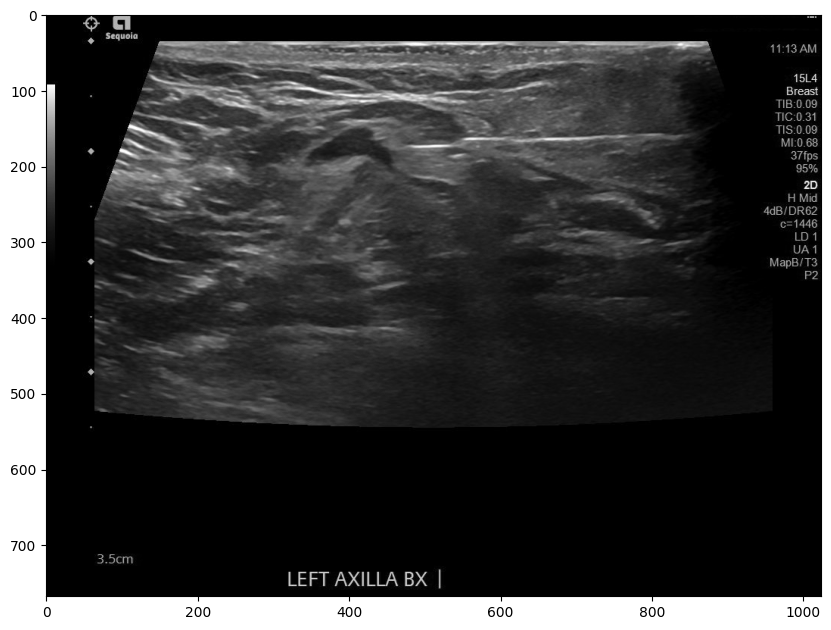

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

# Load the image using PIL
image = Image.open("/content/df.tif").convert("L") # Convert to grayscale

# Convert PIL Image to NumPy array and add channel dimension
image_np = np.array(image, dtype=np.float32)[np.newaxis, ...]  # Add channel dimension for PyTorch

# Convert to PyTorch tensor
image_tensor = torch.from_numpy(image_np)

print(image_tensor.shape)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image_tensor[0], cmap='gray') # Display the first (and only) channel
plt.show()


### **NIFTI Images without MONAI**

* ``NIFTI`` stands for **Neuroimaging Informatics Technology Initiative**
* Install ``nibabel``
* Learn and utilize nibabel's functions to convert them into other formats and interpret images

torch.Size([240, 240, 155])


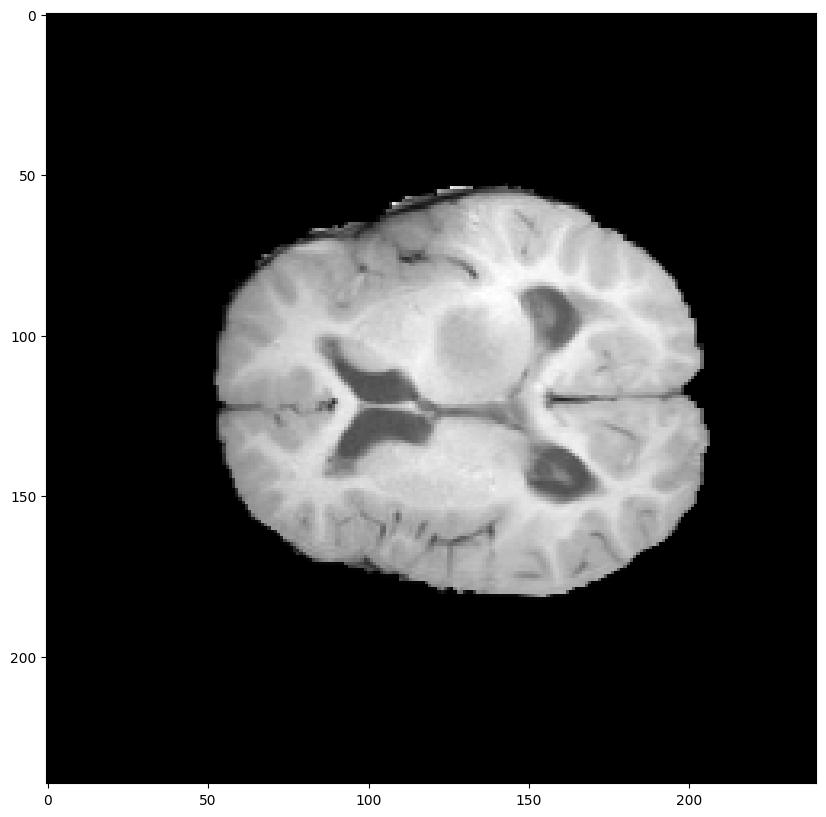

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import torch
import numpy as np #import numpy

# Load the image using NiBabel
image_nib = nib.load("/content/df.nii.gz")
image_np = image_nib.get_fdata().astype(np.float32)

# Convert to PyTorch tensor (optional, if you need it for further processing)
image_tensor = torch.from_numpy(image_np)

print(image_tensor.shape)

# Calculate the index of the middle slice, ensure it's an integer using int()
slice_index = int(image_tensor.shape[2] / 2)

plt.figure(figsize=(10, 10))
plt.imshow(image_tensor[ :, :, slice_index], cmap='gray')  # Select the slice and display it
plt.show()

### **DICOM Images without MONAI**

* ``DICOM`` stands for **Digital Imaging and Communications in Medicine**
* Import ``pydicom``
* Understand pydicom functions to process DICOM images

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.2 MB/s eta 0:00:00


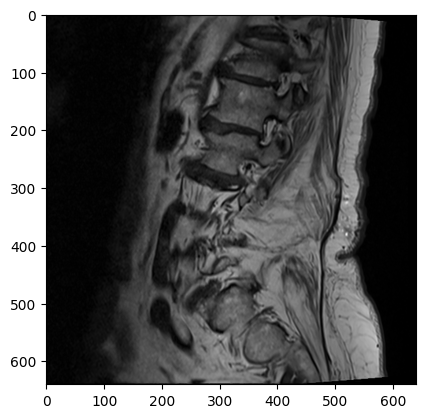

In [ ]:
!pip install pydicom

import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Load the DICOM file
ds = pydicom.dcmread('/content/df.dcm')

# Get the pixel data as a NumPy array
pixel_array = ds.pixel_array

# Display the image
plt.imshow(pixel_array, cmap='gray')
plt.show()

# Save the image as PNG
plt.imsave('/content/dicom.png', pixel_array, cmap='gray')
df.loc[df['File'] == "DICOM", 'path'] = '/content/dicom.png'

## **MONAI Dataset's superiority**

* Syntax: ``md = Dataset(df_extracted,transform=transforms)``
* ``Transform`` uses the power of keys to set identifiers for each image, which enable calling different functions
* ``Compose`` is a popular transform function that allows clubbing multiple transforms together
* ``LoadImaged``: syntax ``LoadImaged(keys="specify",reader=["PILReader" or "NumpyReader" or "NibabelReader" or "PydicomReader"], image_only="True or False",allow_missing_keys="True or False",dtype="np.float32" or "uint8" or "uint16" )``
* ``ToTensord``: syntax ``ToTensord(keys="specify",allow_missing_keys="True or False",dtype="np.float32" or "uint8" or "uint16")``
* ``EnsureChannelFirstd``: syntax ``EnsureChannelFirstd(keys="specified")``


In [ ]:
from monai.data import Dataset

print(f"Printing df's type: {type(df)}")

data_dictionary = [df.set_index('File')['path'].to_dict()]
print(f"Printing data_dictionary's type: {type(data_dictionary)}")
print(f"Printing data_dictionary: {data_dictionary}")

md = Dataset(data_dictionary)

for items in md:
  for key,value in items.items():
    print(key,value)


from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, ToTensord, Rotate90d, Flipd
import numpy as np

# Define the transforms
transforms = Compose(
    [
        LoadImaged(keys=['NIFTI'],reader="NibabelReader", dtype=np.float32),
        LoadImaged(keys=['DICOM','TIF', 'PNG'],reader="PydicomReader",dtype=np.float32),
        EnsureChannelFirstd(keys=['DICOM', 'PNG', 'NIFTI', 'TIF']), #converter=lambda image: image.convert("L")
        ToTensord(keys=['DICOM', 'PNG', 'NIFTI', 'TIF']),
    ]
)

# Create the dataset
# abc = [{"DICOM": "/content/dicom.png","PNG": "/content/df.png","NIFTI": "/content/df.nii.gz","TIF": "/content/df.tif"}]

md = Dataset(md, transform=transforms)

# Iterate through the dataset and print shapes
for items in md:
    for key, value in items.items():  # Iterate through the dictionary items
        print(f"Shape of {key}: {value.shape}")





Printing df's type: <class 'pandas.core.frame.DataFrame'>
Printing data_dictionary's type: <class 'list'>
Printing data_dictionary: [{'DICOM': '/content/dicom.png', 'PNG': '/content/df.png', 'NIFTI': '/content/df.nii.gz', 'TIF': '/content/df.tif'}]
DICOM /content/dicom.png
PNG /content/df.png
NIFTI /content/df.nii.gz
TIF /content/df.tif
Shape of DICOM: torch.Size([4, 640, 640])
Shape of PNG: torch.Size([3, 409, 498])
Shape of NIFTI: torch.Size([1, 240, 240, 155])
Shape of TIF: torch.Size([3, 1024, 768])


DICOM
Plotted
PNG
Plotted
NIFTI
Plotted
TIF
Plotted


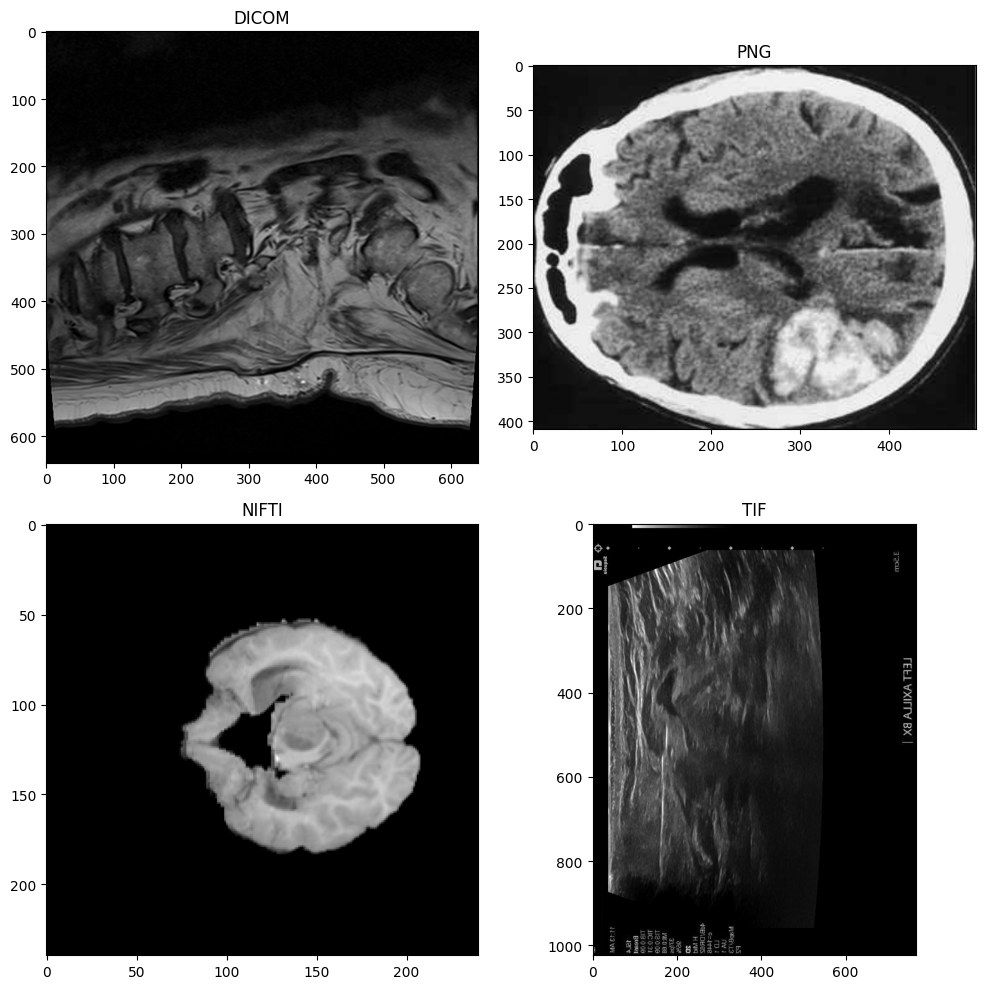

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the axes array for easier indexing

for i, items in enumerate(md):
    for j, (key, value) in enumerate(items.items()):
        print(key)

        # Handle different image dimensions
        if value.ndim == 3:  # 2D images (DICOM, PNG, TIF)
            image_to_display = value[0, :, :]
        elif value.ndim == 4:  # 3D images (NIFTI)
            slice_index = int(value.shape[-1] / 3)
            image_to_display = value[0, :, :, slice_index]

        axes[i * len(items) + j].imshow(image_to_display, cmap='gray')  # Plot on the corresponding subplot
        axes[i * len(items) + j].set_title(key)
        print("Plotted")

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the figure

## **Use case**

<img src="https://github.com/Project-MONAI/monai-bootcamp/blob/main/MONAICore/medical_transforms.png?raw=1" />

* Easily distinguish ``labels`` or  ``Masks`` and ``images``
* Apply unique transform to different ``keys``




# **MONAI: Transforms for Data augmentation**

A lot of geometric and image inherent transforms are available to augment the data available and they are easily clubbed with ``Compose`` and image loading

Today we will integrate the following image transforms:
* ``ScaleIntensityd``
* ``Resized``
* ``RandRotated``
* ``RandFlipd``
* ``RandAdjustContrastd``
* ``RandAxisFlipd``
* ``RandZoomd``
* ``RandRotate90d``
* ``ToNumpyd``

Integrating these functions into the transform methodically will help us get accustomed to the MONAI's transform syntax





## **Geometric Transforms**

Let us start by creating a MONAI dataset ``md2`` with ``'PNG'`` and ``'PNG1'``, which consists of same ``/content/df.png`` image but we will observe the differences in the transforms

* ``Rotate90d``: syntax ``Rotate90d(keys="specified",k="no of times (int)",spatial_axis (H,W)="(0,1)")``
* ``RandFlipd``: syntax ``RandFlipd(keys="specified",prob="probability (0,1]",spatial_axis="tuple (0,1)")``
* There are also ``RandRotate90d`` and ``Flipd``



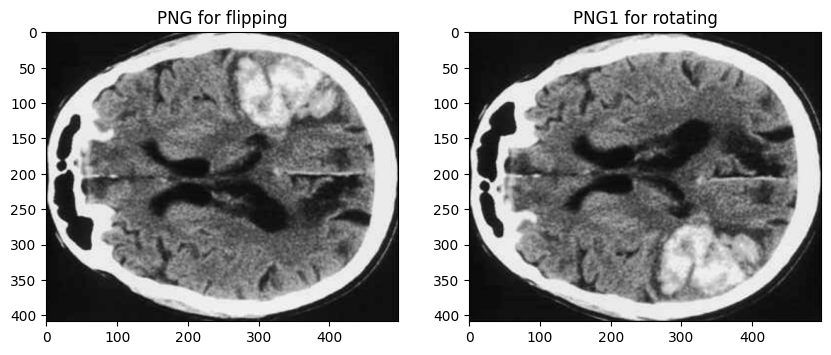

In [ ]:
new_dict = data = [{'PNG': '/content/df.png', 'PNG1': '/content/df.png'}]



from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, ToTensord, RandFlipd, Rotate90d
import numpy as np

geometric_transforms = Compose(
       [
           LoadImaged(keys=['PNG', 'PNG1'], reader="PILReader", dtype=np.float32),
           EnsureChannelFirstd(keys=['PNG', 'PNG1']),
           RandFlipd(keys=['PNG'], prob=1.0, spatial_axis=0), # prob = 1.0 ensures this transform will always be applied
           Rotate90d(keys=['PNG1'],k=1,spatial_axes=(0,1)), # prob = 1.0 ensures this transform will always be applied
           ToTensord(keys=['PNG', 'PNG1']),

       ]
   )

md2 = Dataset(new_dict, transform=geometric_transforms)

import matplotlib.pyplot as plt
for items in md2:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(items['PNG'][0, :, :], cmap='gray')
    plt.title('PNG for flipping')
    plt.subplot(1, 2, 2)
    plt.imshow(items['PNG1'][0, :, :], cmap='gray')
    plt.title('PNG1 for rotating')
    plt.show()

Next let us look at ``Resize``, ``Zoom``, and RandRotate for which, we will be creating md3 with keys DICOM, DICOM1, and DICOM2 and loading the image ``/content/DICOM.png`` into them. We will compose a tranform that maintains DICOM with no changes and DICOM1 and DICOM2 will reflect some of the transforms combined and we will visualize them in the figures

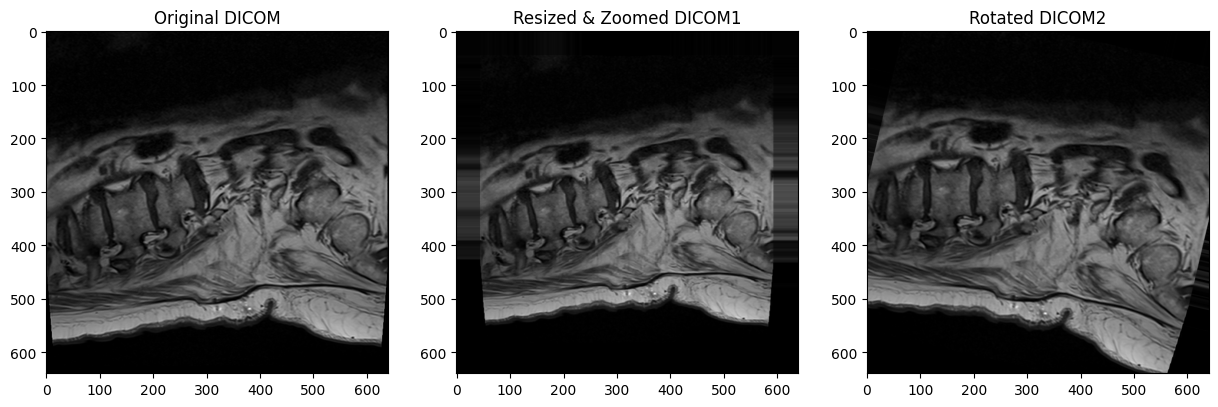

In [ ]:
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, ToTensord, Resized, RandZoomd, RandRotated
import numpy as np

# Create a new dictionary for md3
new_dict = [{'DICOM': '/content/dicom.png',
             'DICOM1': '/content/dicom.png',
             'DICOM2': '/content/dicom.png'}]

# Define transforms for md3
transforms_md3 = Compose(
    [
        LoadImaged(keys=['DICOM', 'DICOM1', 'DICOM2'], reader="PILReader", dtype=np.float32),
        EnsureChannelFirstd(keys=['DICOM', 'DICOM1', 'DICOM2']),
        # Resized(keys=['DICOM1'], spatial_size=(320, 320)),  # Resize DICOM1
        RandZoomd(keys=['DICOM1'], prob=1.0, min_zoom=0.8, max_zoom=1.2),  # Zoom DICOM1
        RandRotated(keys=['DICOM2'], range_x=0.5, prob=1.0),  # Rotate DICOM2
        ToTensord(keys=['DICOM', 'DICOM1', 'DICOM2']),
    ]
)

# Create md3 dataset
md3 = Dataset(new_dict, transform=transforms_md3)

# Visualize the images
import matplotlib.pyplot as plt

for items in md3:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(items['DICOM'][0, :, :], cmap='gray')
    plt.title('Original DICOM')
    plt.subplot(1, 3, 2)
    plt.imshow(items['DICOM1'][0, :, :], cmap='gray')
    plt.title('Resized & Zoomed DICOM1')
    plt.subplot(1, 3, 3)
    plt.imshow(items['DICOM2'][0, :, :], cmap='gray')
    plt.title('Rotated DICOM2')
    plt.show()

THe commonly used rotation in 3D is ``RandAffined``: it combines the effect of rotation, translation, and shear in all 3 dimensions

We use NIFTI image to visualize the outcomes

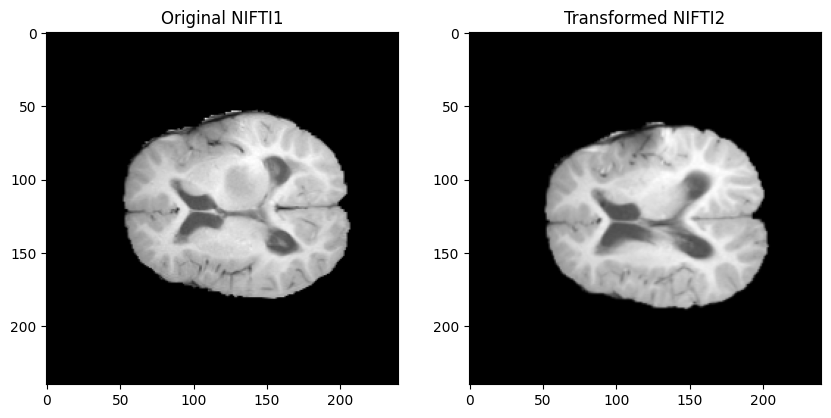

In [ ]:
new_dict_nifti = [{'NIFTI1': '/content/df.nii.gz', 'NIFTI2': '/content/df.nii.gz'}]

from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, ToTensord,
    RandAffined, ToNumpyd
)
import numpy as np

nifti_transforms = Compose(
    [
        LoadImaged(keys=['NIFTI1', 'NIFTI2'], reader="NibabelReader", dtype=np.float32),
        EnsureChannelFirstd(keys=['NIFTI1', 'NIFTI2']),
        RandAffined(keys=['NIFTI2'], prob=1.0,
                    rotate_range=(0.1, 0.1, 0.1),  # Rotation in radians
                    shear_range=(0.01, 0.01, 0.01),   # Shear range
                    translate_range=(10, 10, 10)    # Translation in pixels
                   ),
        ToNumpyd(keys=['NIFTI1', 'NIFTI2']),
    ]
)

#3. Create the dataset:


md_nifti = Dataset(new_dict_nifti, transform=nifti_transforms)

#4. Visualize:


import matplotlib.pyplot as plt

for items in md_nifti:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(items['NIFTI1'][0, :, :, items['NIFTI1'].shape[-1]//2], cmap='gray')  # Display middle slice
    plt.title('Original NIFTI1')
    plt.subplot(1, 2, 2)
    plt.imshow(items['NIFTI2'][0, :, :, items['NIFTI2'].shape[-1]//2], cmap='gray')  # Display middle slice
    plt.title('Transformed NIFTI2')
    plt.show()

All these transforms are applied on the diemnsions of the image

## **Intensity Transforms**

In contrast to geometric transforms that apply on the image dimensions, intensity transforms apply on the signal or channels of the image.

To observe the changes, we will create three keys PNG PNG1 and PNG2 andretain PNG without any changes, but we will be scaling the intensities in PNG1 and normalizing the intensities in PNG2.

Similar to the previous methods, we will plot them side-by-side to observe the differences generated.

* ScaleIntensityd(minv=0.0, maxv=1.0, factor=None, channel_wise=False, dtype='numpy.float32')

$Scaledintensity = \frac{img-minv}{maxv-minv}$
* NormalizeIntensity(subtrahend=None, divisor=None, nonzero=False, channel_wise=False, dtype=class 'numpy.float32')

$ Normalized intensity = \frac{(img - subtrahend)}{ divisor}$

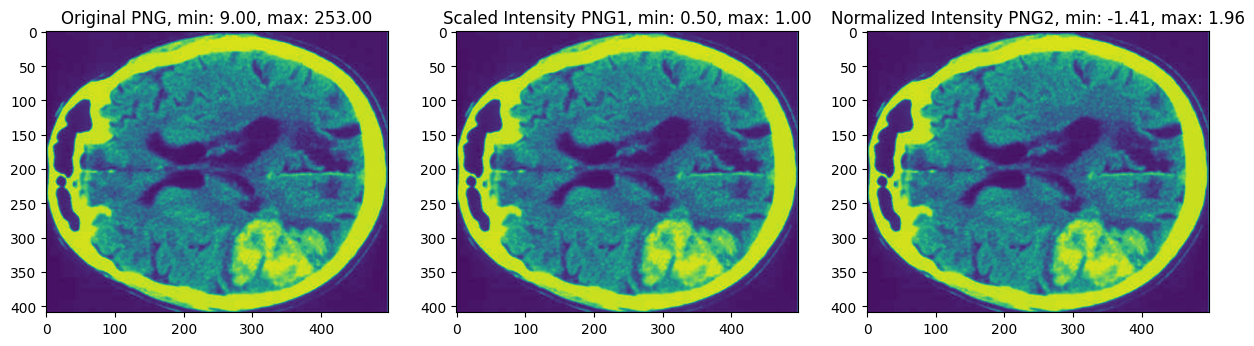

In [ ]:
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, ToNumpyd,
    ScaleIntensityd, NormalizeIntensityd
)
import numpy as np
import matplotlib.pyplot as plt

# Define transforms for intensity changes
transforms_intensity = Compose(
    [
        LoadImaged(keys=['PNG', 'PNG1', 'PNG2'], reader="PILReader", dtype=np.float32),
        EnsureChannelFirstd(keys=['PNG', 'PNG1', 'PNG2']),
        ToNumpyd(keys=['PNG', 'PNG1', 'PNG2'],dtype=np.float32),
        ScaleIntensityd(keys=['PNG1'],minv=0.5,maxv=1.0),  # Scale intensity of PNG1
        NormalizeIntensityd(keys=['PNG2'],dtype=np.float32),  # Normalize intensity of PNG2
        ToNumpyd(keys=['PNG', 'PNG1', 'PNG2'],dtype=np.float32),

    ]
)

# Create a new dictionary for the images
new_dict_intensity = [{'PNG': '/content/df.png',
                       'PNG1': '/content/df.png',
                       'PNG2': '/content/df.png'}]

# Create the dataset with intensity transforms
md_intensity = Dataset(new_dict_intensity, transform=transforms_intensity)

# Visualize the images
for items in md_intensity:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(items['PNG'][0, :, :])
    plt.title(f'Original PNG, min: {items["PNG"].min():.2f}, max: {items["PNG"].max():.2f}')
    plt.subplot(1, 3, 2)
    plt.imshow(items['PNG1'][0, :, :])
    plt.title(f'Scaled Intensity PNG1, min: {items["PNG1"].min():.2f}, max: {items["PNG1"].max():.2f}')
    plt.subplot(1, 3, 3)
    plt.imshow(items['PNG2'][0, :, :])
    plt.title(f'Normalized Intensity PNG2, min: {items["PNG2"].min():.2f}, max: {items["PNG2"].max():.2f}')
    plt.show()

Next we look at Threshold intensity:

* Syntex: ``ThresholdIntensity(threshold, above=True, cval=0.0)``

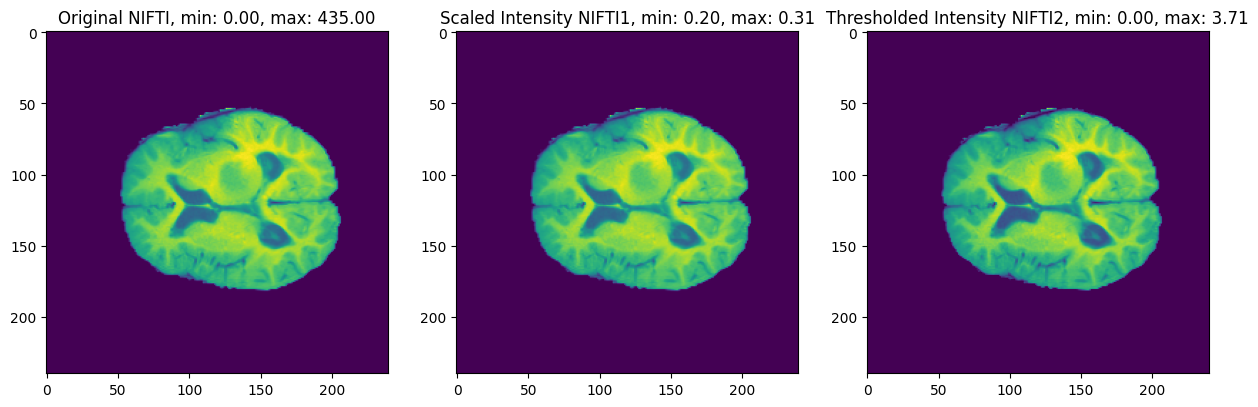

In [ ]:
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, ToNumpyd,
    ScaleIntensityd, NormalizeIntensityd, Lambdad, ThresholdIntensityd
)
import numpy as np
import matplotlib.pyplot as plt

# Define transforms for intensity changes
transforms_intensity_nifti = Compose(
    [
        LoadImaged(keys=['NIFTI', 'NIFTI1', 'NIFTI2'], reader="NibabelReader", dtype=np.float32),
        EnsureChannelFirstd(keys=['NIFTI', 'NIFTI1', 'NIFTI2']),
        ToNumpyd(keys=['NIFTI', 'NIFTI1', 'NIFTI2'],dtype=np.float16),
        ScaleIntensityd(keys=['NIFTI1'],minv=0.2,maxv=0.5),  # Scale intensity of NIFTI1
        NormalizeIntensityd(keys=['NIFTI2']),  # Normalize intensity of NIFTI2
        ThresholdIntensityd(keys=['NIFTI2'],threshold = 0.1,above=True,cval=0.0), # Threshold intensity of NIFTI2
        Lambdad(keys=['NIFTI', 'NIFTI1', 'NIFTI2'], func=lambda x: x[0, :, :, x.shape[-1]//2]), # Select the middle slice
        ToNumpyd(keys=['NIFTI', 'NIFTI1', 'NIFTI2'],dtype=np.float16),
    ]
)

# Create a new dictionary for the images
new_dict_intensity_nifti = [{'NIFTI': '/content/df.nii.gz',
                             'NIFTI1': '/content/df.nii.gz',
                             'NIFTI2': '/content/df.nii.gz'}]

# Create the dataset with intensity transforms
md_intensity_nifti = Dataset(new_dict_intensity_nifti, transform=transforms_intensity_nifti)

# Visualize the images
for items in md_intensity_nifti:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(items['NIFTI'])
    plt.title(f'Original NIFTI, min: {items["NIFTI"].min():.2f}, max: {items["NIFTI"].max():.2f}')
    plt.subplot(1, 3, 2)
    plt.imshow(items['NIFTI1'])
    plt.title(f'Scaled Intensity NIFTI1, min: {items["NIFTI1"].min():.2f}, max: {items["NIFTI1"].max():.2f}')
    plt.subplot(1, 3, 3)
    plt.imshow(items['NIFTI2'])
    plt.title(f'Thresholded Intensity NIFTI2, min: {items["NIFTI2"].min():.2f}, max: {items["NIFTI2"].max():.2f}')
    plt.show()

# **MONAI End to End workflow**

MONAI supports deep learning in medical image analysis at multiple levels. This figure shows a typical example of an end-to-end workflow in a medical deep learning context:

<center><img src="https://github.com/Project-MONAI/monai-bootcamp/blob/main/MONAICore/end_to_end.png?raw=1" style="width: 1400px;"/></center>

# **Task**

Here are some tasks to help you practice the commands:



## **Task 1: Experimenting with MONAI Dataset**

**Objective**: To understand and apply the MONAI Dataset for organizing and transforming medical image data.

**Scenario**: You are provided with various medical image files (NIFTI & PNG) located in a Google Colab environment. Your task is to:

* Utilize the MONAI Dataset to load and transform these images.
* Apply a series of augmentation transforms, including geometric and intensity transformations.
*Visualize the original and transformed images.

## **Task 2: Resizing a Medical Image**

**Objective**: To understand and apply the Resized transform in MONAI for resizing a medical image.

* Utilize the MONAI Dataset to load and transform these images.
* Apply a series of augmentation transforms, including geometric and intensity transformations.
*Visualize the original and transformed images.

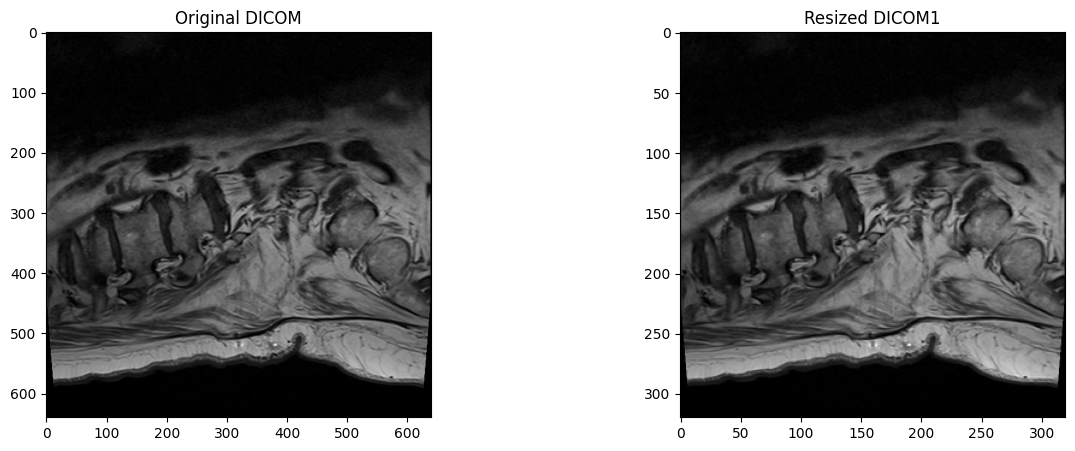

## **Task 3: 3D transforms**

This task focuses on applying various MONAI transforms to augment medical images (NIFTI format) and visualize the results. Students will:

Load a 3D NIFTI medical image using LoadImaged.
Apply a series of augmentation transforms, including:
* RandAffined (random rotation, translation, and scaling)
* RandGaussianNoise (adding random noise)
* RandAdjustContrast (adjusting image contrast)

Convert the augmented image to a NumPy array using ToNumpyd.

Visualize the original and augmented images using Matplotlib.

This task helps reinforce the understanding of MONAI transforms, data loading, and image visualization. By applying different augmentations, you will observe the effects on medical images and gain experience in manipulating image data.